---
 model coefficient:
ad_spend: 1.4930
store_visits: 5.0549
discount: -10.1152
competitor_price: -0.8503
season_index: 49.9772
intercept: -5.8027
---

----evaluation metrics on test set----
R^2: 0.9436
MSE: 252832.75
MSE: 252832.75
RMSE: 502.82


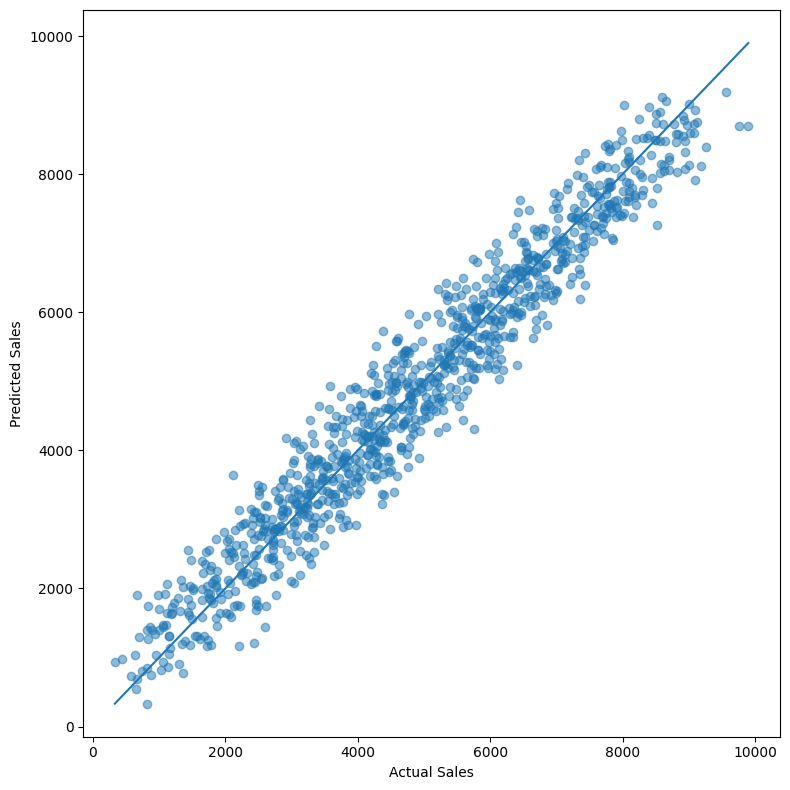

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

# Load the dataset
df = pd.read_csv("linear_regression_training_dataset_5000.csv")

# print("----- First 5 rows -----")
# print(df.head())

# print("\n----- Dataset Info -----")
# print(df.info())

# print("\n----- Descriptive Statistics -----")
# print(df.describe())


# Define features (X) and target (y)
feature_cols = ["ad_spend", "store_visits", "discount", "competitor_price", "season_index"]

X = df[feature_cols]     
Y = df["sales"]          


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

#train the linear regression model
model=LinearRegression()
model.fit(X_train, y_train)                  
print("---\n model coefficient:")
for name, coef in zip(feature_cols, model.coef_):
    print(f"{name}: {coef:.4f}")

print(f"intercept: {model.intercept_:.4f}\n---")

#evaluate the model 
y_pred = model.predict(X_test)
r2=r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=mse**0.5
print("\n----evaluation metrics on test set----")
print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

#plot predicted vs actual sales
plt.figure(figsize=(8, 8)) 
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")

#plot ideal line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.tight_layout()
plt.show()

    

